<a href="https://colab.research.google.com/github/Mostafa772/ML_MIPT_HW/blob/lab_1/Copy_of_Lab1_part2_ml_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2022-11-26 15:17:20--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2022-11-26 15:17:21 (3.94 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
print(dataset.shape)
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# print(target)

(846, 20)
(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
1,253,94,43,68,170,67,6,142,46,18,142,164,310,177,65,10,8,198,203
2,681,96,46,70,194,70,6,167,39,20,148,183,427,171,69,17,10,200,203
3,99,87,44,65,124,56,6,149,46,19,144,170,321,171,87,4,12,179,182
4,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
5,175,88,40,78,186,73,6,158,41,20,134,185,379,148,73,1,11,193,197
6,656,84,42,76,156,64,7,151,44,19,143,179,339,157,75,0,20,187,193
7,827,99,57,100,177,54,13,224,30,25,188,223,726,213,72,4,7,185,198
8,636,96,41,69,153,56,7,141,47,18,141,162,297,169,61,11,8,202,209
9,614,85,33,50,104,53,4,115,59,17,118,136,193,127,83,1,30,179,185


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.107468,93.451730,44.836066,81.548270,168.118397,61.624772,8.508197,168.071038,41.111111,20.531876,147.918033,187.945355,435.879781,174.653916,72.469945,6.010929,12.604736,188.939891,195.559199
std,245.075106,7.954704,6.054383,15.627155,33.086298,7.631177,4.568460,33.051945,7.754940,2.568298,14.164397,31.167676,176.043397,32.397740,7.121054,4.748018,8.802914,6.316040,7.654411
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,182.000000
25%,207.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,146.000000,34.000000,19.000000,138.000000,167.000000,318.000000,151.000000,67.000000,2.000000,6.000000,184.000000,190.000000
50%,431.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,177.000000,362.000000,174.000000,72.000000,5.000000,11.000000,188.000000,197.000000
75%,635.000000,99.000000,49.000000,96.000000,195.000000,65.000000,10.000000,196.000000,46.000000,23.000000,159.000000,214.000000,575.000000,197.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,117.000000,58.000000,112.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,119.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
# print(scaler.transform(data))
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)


In [31]:
X_train_stand_pd = pd.DataFrame(X_train_standardized)
X_train_stand_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,9.706868e-18,-8.833250e-16,2.628943e-16,4.562228e-16,-3.526829e-16,2.426717e-16,-1.795771e-16,-3.947460e-16,-4.141597e-16,5.888833e-16,-2.103155e-16,2.459073e-16,-6.471245e-18,3.235623e-16,-1.294249e-17,1.003043e-16,7.765494e-17,-3.882747e-17,1.067755e-15
std,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-1.728015e+00,-2.573368e+00,-1.956741e+00,-2.661147e+00,-1.939681e+00,-1.918198e+00,-1.425892e+00,-1.697999e+00,-1.950356e+00,-1.376436e+00,-2.114126e+00,-1.860845e+00,-1.432087e+00,-2.028345e+00,-1.893291e+00,-1.267142e+00,-1.433188e+00,-2.050603e+00,-1.773038e+00
25%,-8.826052e-01,-8.117982e-01,-7.994994e-01,-7.396613e-01,-8.506253e-01,-6.065893e-01,-5.495253e-01,-6.683772e-01,-9.178145e-01,-5.969998e-01,-7.008472e-01,-6.726346e-01,-6.702171e-01,-7.307759e-01,-7.688376e-01,-8.455290e-01,-7.509740e-01,-7.828316e-01,-7.269362e-01
50%,3.223391e-02,-5.683962e-02,-1.382185e-01,-1.632155e-01,-9.433636e-02,-8.194570e-02,-1.113417e-01,-3.655472e-01,2.437945e-01,-2.072817e-01,-1.355357e-01,-3.514968e-01,-4.200507e-01,-2.020241e-02,-6.605398e-02,-2.131102e-01,-1.824622e-01,-1.489458e-01,1.884032e-01
75%,8.653909e-01,6.981189e-01,6.883826e-01,9.256266e-01,8.132103e-01,4.426979e-01,3.268418e-01,8.457727e-01,6.309975e-01,9.618724e-01,7.830954e-01,8.367132e-01,7.909816e-01,6.903711e-01,4.961729e-01,6.301149e-01,7.271566e-01,6.434114e-01,7.114543e-01
max,1.718968e+00,2.962995e+00,2.176265e+00,1.950419e+00,4.655158e+00,9.361639e+00,1.018597e+01,2.935300e+00,2.567012e+00,3.300181e+00,2.832350e+00,3.213133e+00,3.309702e+00,2.883881e+00,6.540112e+00,3.370596e+00,3.228608e+00,2.703540e+00,2.019082e+00


In [32]:
X_train_stand_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.256860,1.327251,2.010944,1.373973,1.630002,1.360824,0.765025,1.602848,-1.434085,1.741308,2.055046,1.125737,1.604022,1.339156,-0.066054,1.051727,-0.068760,-0.465889,-0.073122
1,-0.694736,0.068987,-0.303539,-0.867760,0.056921,0.705020,-0.549525,-0.789509,0.630997,-0.986718,-0.418191,-0.768976,-0.715702,0.072481,-1.049951,0.840921,-0.523569,1.435769,0.972980
2,1.053260,0.320640,0.192422,-0.739661,0.782959,1.098502,-0.549525,-0.032434,-0.272476,-0.207282,0.005792,-0.158814,-0.050487,-0.112886,-0.487724,2.316565,-0.296165,1.752711,0.972980
3,-1.323688,-0.811798,-0.138219,-1.059909,-1.334650,-0.737750,-0.549525,-0.577528,0.630997,-0.597000,-0.276864,-0.576293,-0.653160,-0.112886,2.042297,-0.423916,-0.068760,-1.575189,-1.773038
4,-1.723930,-0.308492,-0.634179,0.157032,-0.820374,-0.606589,0.107750,-0.577528,0.501930,-0.597000,-0.347528,-0.576293,-0.601990,-0.514514,-0.066054,0.630115,0.158645,0.009526,0.449929
5,-1.013296,-0.685972,-0.799499,-0.227265,0.540946,1.491985,-0.549525,-0.304981,-0.014341,-0.207282,-0.983503,-0.094586,-0.323396,-0.823459,0.074503,-1.056335,-0.182462,0.643411,0.188403
6,0.951157,-1.189277,-0.468859,-0.355364,-0.366600,0.311537,-0.330433,-0.516962,0.372862,-0.597000,-0.347528,-0.287269,-0.550819,-0.545409,0.355616,-1.267142,0.840859,-0.307417,-0.334648
7,1.649539,0.698119,2.010944,1.181825,0.268682,-1.000072,0.984117,1.693697,-1.434085,1.741308,2.832350,1.125737,1.649507,1.184683,-0.066054,-0.423916,-0.637272,-0.624360,0.319166
8,0.869475,0.320640,-0.634179,-0.803711,-0.457355,-0.737750,-0.330433,-0.819792,0.760065,-0.986718,-0.488855,-0.833204,-0.789615,-0.174675,-1.612178,1.051727,-0.523569,2.069654,1.757556
9,0.779625,-1.063451,-1.956741,-2.020652,-1.939681,-1.131233,-0.987709,-1.607150,2.308877,-1.376436,-2.114126,-1.668162,-1.380917,-1.472244,1.480070,-1.056335,1.977882,-1.575189,-1.380750


In [24]:
# def plot_coefficients(classifier, feature_names, top_features=-1):
#   if top_features == -1:
#     top_features = len(feature_names)

#   coef = classifier.coef_.ravel()
#   abs_coef = np.abs(coef)
#   top_coefficients = np.argsort(-abs_coef)[-top_features:]
#   print(top_features)
#   print(top_coefficients)
#   print(feature_names[top_coefficients])
#   # create plot
#   plt.clf()
#   plt.figure(figsize=(15, 3))
#   #  colors = [color_palette[c > 0] for c in coef[top_coefficients]]
#   plt.bar(np.arange(top_features), coef[top_coefficients])
#   feature_names = np.array(feature_names)
#   plt.xticks(np.arange(0, 18), feature_names[top_coefficients], rotation=60, ha='right')
#   plt.title("Feature coefficients")
#   plt.ylabel("Coefficient")

# feature_names = list(X_train_pd.columns.values)
# plot_coefficients(classifier, feature_names)
# plt.show()


19
[53  7 25 54 12 32 31 69 28 72 35 13 49 10 22 57  0 19 38]


TypeError: ignored

In [9]:
n_features = X_train_pd.shape[1]
k = 18 # Number of components
# fn = FeatureNormalize()
# don't normalize but standardize
 
fn.fit(X_train)

X_train_norm = fn.transform(X_train)

fn.fit(X_test)
X_test_norm = fn.transform(X_test)

NameError: ignored

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
### YOUR CODE HERE

In [11]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.model_selection import GridSearchCV
import numpy as np
import scikitplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

In [34]:
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

param_grid = {'C': np.logspace(-4, 4, 20), 'l1_ratio': np.linspace(0, 1, 11),
              'penalty' :['elasticnet']}

space = dict()
space['solver'] = ['newton-cg' , 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
search = GridSearchCV(model, param_grid, cv=5).fit(X_train_standardized, y_train)

# search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy',
#                             n_jobs= -1, cv=cv, random_state=1)

The best parameters are {'C': 11.288378916846883, 'l1_ratio': 0.0, 'penalty': 'elasticnet'}
F1 score of this model:  0.8277471976286631
Accuracy score of this model:  0.8181818181818182


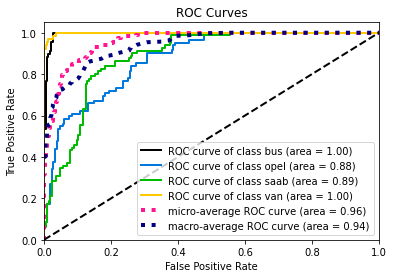

In [36]:
print(f"The best parameters are {search.best_params_}")
y_predicted = search.predict(X_test_standardized)
print("F1 score of this model: ", f1_score(y_test, y_predicted, average='macro'))
print("Accuracy score of this model: ", search.score(X_test_standardized, y_test))
    
# Plot the ROC-curve
predicted_proba = search.predict_proba(X_test_standardized)
scikitplot.metrics.plot_roc(y_test, predicted_proba)
plt.show()

In [45]:
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy',
                            n_jobs= -1, cv=cv, random_state=1).fit(X_train_standardized, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2640 fits failed out of a total of 7500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1035 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1473, in fit
    % self.l1_ratio
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

--------------------------------------------------------------------------------
795 fits failed with the following error:
T

The best parameters are {'C': 75.80883037198562, 'penalty': 'l2', 'solver': 'newton-cg'}
F1 score of this model:  0.8094367658842896
Accuracy score of this model:  0.797979797979798


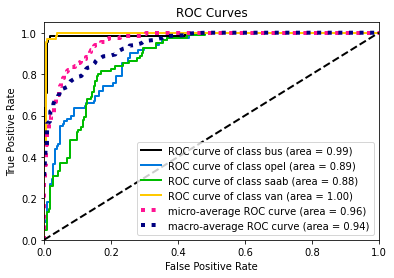

In [46]:
print(f"The best parameters are {search.best_params_}")
y_predicted = search.predict(X_test_standardized)
print("F1 score of this model: ", f1_score(y_test, y_predicted, average='macro'))
print("Accuracy score of this model: ", search.score(X_test_standardized, y_test))
    
# Plot the ROC-curve
predicted_proba = search.predict_proba(X_test_standardized)
scikitplot.metrics.plot_roc(y_test, predicted_proba)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

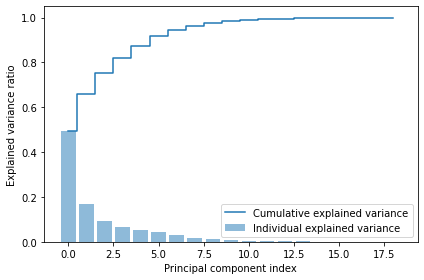

8


In [64]:
# Import eigh method for calculating eigenvalues and eigenvectirs
#
from numpy.linalg import eigh
#
# Determine covariance matrix
#
cov_matrix = np.cov(X_train_standardized, rowvar=False)
#
# Determine eigenvalues and eigenvectors
#
egnvalues, egnvectors = eigh(cov_matrix)
#
# Determine explained variance
#
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
#
# Plot the explained variance against cumulative explained variance
#
import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
d = np.argmax(cum_sum_exp >= 0.95) + 1
print(d)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

We use PCA(Pricnipal Component Analysis) to transform a big data set with a big set of vars into a smaller dataset while keeping most of the information, because of that we need to make sure that the when we are choosing the featurs (doing the analysis) each one of these features (variables) equally contributes to the analysis. 

In [73]:
### YOUR CODE HERE

pca = PCA(n_components=8)
X_test_pca_transform = pca.fit_transform(X_test)
X_train_pca_transform = pca.fit_transform(X_train)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

The best parameters are {'penalty': 'elasticnet', 'l1_ratio': 0.1, 'C': 29.763514416313132}
F1 score :  0.8122306105467241
Accuracy score :  0.8013468013468014


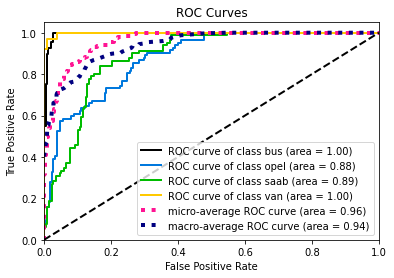

In [74]:
### YOUR CODE HERE

model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
param_grid = {'C': np.logspace(-4, 4, 20), 'l1_ratio': np.linspace(0, 1, 11), 'penalty' :['elasticnet']}

search = RandomizedSearchCV(model, param_grid, cv=5).fit(X_train_standardized, y_train)

print("The best parameters are %s" % (search.best_params_))

y_predicted = search.predict(X_test_standardized)

print("F1 score : ", f1_score(y_test, y_predicted, average='macro'))
print("Accuracy score : ", search.score(X_test_standardized, y_test))

# why when we do average = micro we get the same as accuracy score? 
# read and compare between them they most be doing the same thing

# Plot the ROC-curve
predicted_proba = search.predict_proba(X_test_standardized)
scikitplot.metrics.plot_roc(y_test, predicted_proba)
plt.show()

The best parameters are {'penalty': 'elasticnet', 'l1_ratio': 0.0, 'C': 0.012742749857031334}
F1 score :  0.5064263443637781
Accuracy score :  0.5185185185185185


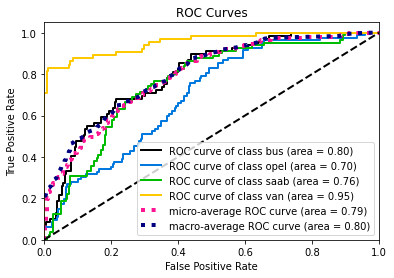

In [75]:
### YOUR CODE HERE
# pca transform for X_test

lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
param_grid = {'C': np.logspace(-4, 4, 20), 'l1_ratio': np.linspace(0, 1, 11), 'penalty' :['elasticnet']}

clf = RandomizedSearchCV(lr, param_grid, cv=5).fit(X_train_pca_transform, y_train)

print("The best parameters are %s" % (clf.best_params_))

y_predicted = clf.predict(X_test_pca_transform)

print("F1 score : ", f1_score(y_test, y_predicted, average='macro'))
print("Accuracy score : ", clf.score(X_test_pca_transform, y_test))

# Plot the ROC-curve
predicted_proba = clf.predict_proba(X_test_pca_transform)
scikitplot.metrics.plot_roc(y_test, predicted_proba)
plt.show()

The best parameters are {'C': 0.08858667904100823, 'l1_ratio': 0.0, 'penalty': 'elasticnet'}
F1 score :  0.5064263443637781
Accuracy score :  0.5185185185185185


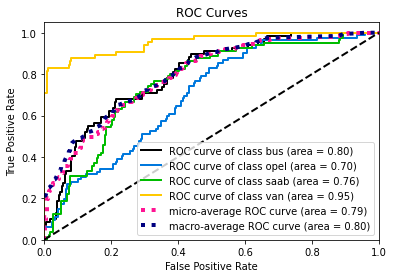

In [76]:
### YOUR CODE HERE
# pca transform for X_test

lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
param_grid = {'C': np.logspace(-4, 4, 20), 'l1_ratio': np.linspace(0, 1, 11), 'penalty' :['elasticnet']}

clf = GridSearchCV(lr, param_grid, cv=5).fit(X_train_pca_transform, y_train)

print("The best parameters are %s" % (clf.best_params_))

y_predicted = clf.predict(X_test_pca_transform)

print("F1 score : ", f1_score(y_test, y_predicted, average='macro'))
print("Accuracy score : ", clf.score(X_test_pca_transform, y_test))

# Plot the ROC-curve
predicted_proba = clf.predict_proba(X_test_pca_transform)
scikitplot.metrics.plot_roc(y_test, predicted_proba)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [94]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

clf = DecisionTreeClassifier()
clf.fit(X_train_standardized, y_train)

predictions = clf.predict(X_test_standardized)
# print(accuracy_score(y_test, predictions))

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10, 12, 14, 18, 22],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

gs_cv = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1
)

gs_cv.fit(X_train_standardized, y_train)
print(gs_cv.best_params_)

print("F1 score : ", f1_score(y_test, y_predicted, average='macro'))
print("Accuracy score : ", gs_cv.score(X_test_standardized, y_test))

{'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'splitter': 'best'}
F1 score :  0.7413476752593166
Accuracy score :  0.6734006734006734


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

$\color{green}{\ The \ answer :}$ I think that the hyperparameters are good but of course I don't think optimal. They are good as we are getting almost the same number of trees as with Random Forest.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

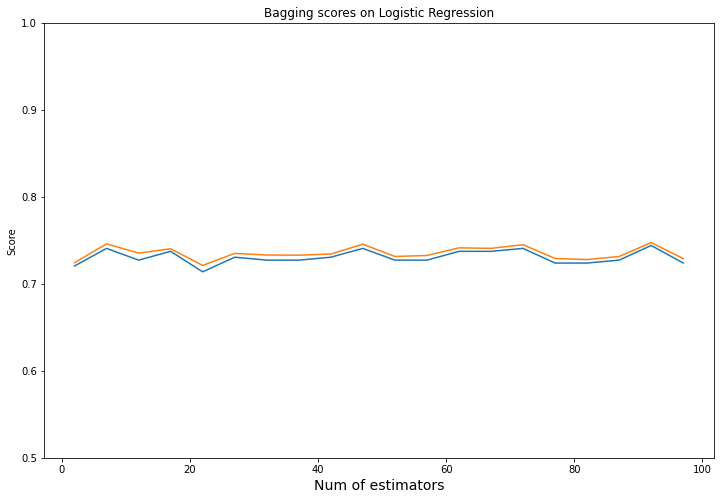

In [89]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

N = np.arange(2, 100, 5, dtype=np.int16) 
count = len(N)

accuracy_score = np.zeros(count)
f1_test_score = np.zeros(count)

lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C= 0.08858667904100823, l1_ratio= 0.0, penalty= 'elasticnet')

for i in range(count):
    clf = BaggingClassifier(lr, n_estimators=N[i])
    clf.fit(X_train_standardized, y_train)
    accuracy_score[i] = clf.score(X_test_standardized, y_test)
    y_predicted = clf.predict(X_test_standardized)
    f1_test_score[i] = f1_score(y_test, y_predicted, average='macro')

 
plt.figure(figsize=(12, 8))
plt.xlabel("Num of estimators", fontsize=14)
plt.ylabel("Score")
plt.plot(N, accuracy_score, label='Accuracy Score')
plt.plot(N, f1_test_score, label='F1 Score')
plt.ylim(0.5, 1)
plt.title("Bagging scores on Logistic Regression")
plt.show()

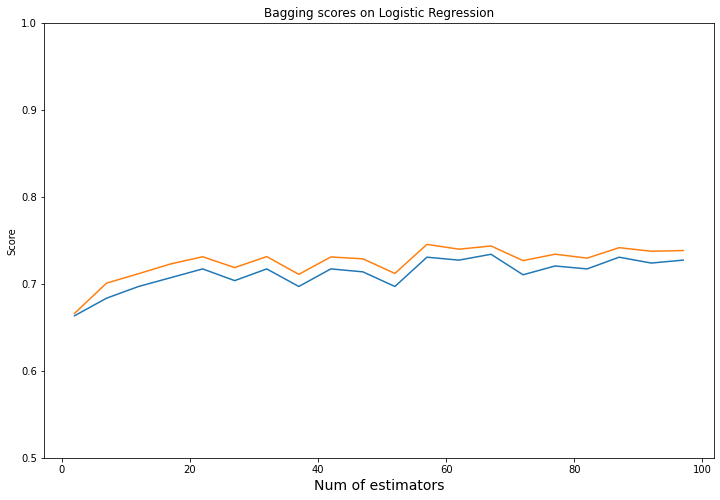

In [90]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

N = np.arange(2, 100, 5, dtype=np.int16) 
count = len(N)

accuracy_score = np.zeros(count)
f1_test_score = np.zeros(count)

decision_tree_clf = DecisionTreeClassifier()
for i in range(count):
    clf = BaggingClassifier(decision_tree_clf, n_estimators=N[i])
    clf.fit(X_train_standardized, y_train)
    accuracy_score[i] = clf.score(X_test_standardized, y_test)
    y_predicted = clf.predict(X_test_standardized)
    f1_test_score[i] = f1_score(y_test, y_predicted, average='macro')

                            
plt.figure(figsize=(12, 8))
plt.xlabel("Num of estimators", fontsize=14)
plt.ylabel("Score")
plt.plot(N, accuracy_score, label='Accuracy Score')
plt.plot(N, f1_test_score, label='F1 Score')
plt.ylim(0.5, 1)
plt.title("Bagging scores on Logistic Regression")
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

$\color{green}{\ The \  answer:}$ We are getting almost the same result.
Random Forests are an improvement over bagged decision trees. As random forest changes the algorithm for the way that the sub-trees are learned so that the resulting predictions from all of the subtrees have less correlation.

20


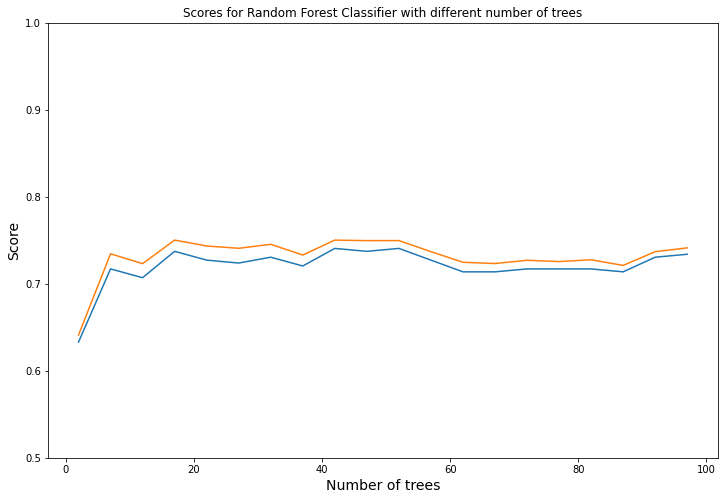

In [91]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
# 'criterion': 'entropy', 'max_depth': 12, 'max_features': 0.8, 'splitter': 'best'

# param_grid = {'n_estimators': np.linspace(1, 100, 100, dtype=np.int16)}
clf = RandomForestClassifier(random_state=42)
N = np.arange(2, 100, 5, dtype=np.int16) 
count = len(N)

accuracy_score = np.zeros(count)
f1_test_score = np.zeros(count)

for i in range(count):
    clf = RandomForestClassifier(random_state=42, n_estimators=N[i])
    clf.fit(X_train_standardized, y_train)
    accuracy_score[i] = clf.score(X_test_standardized, y_test)
    y_predicted = clf.predict(X_test_standardized)
    f1_test_score[i] = f1_score(y_test, y_predicted, average='macro')

    
plt.figure(figsize=(12, 8))
plt.xlabel("Number of trees", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.plot(N, accuracy_score, label='accuracy score')
plt.plot(N, f1_test_score, label='f1 score')
plt.ylim(0.5, 1)
plt.title("Bagging Score on Random Forest Classifier with different number of trees")
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE